In [307]:
import tensorflow as tf  
import numpy as np          
import argparse
import pandas as pd
from termcolor import colored
import anndata as ad

# 1 Read in data

In [308]:
# Blood ROSMAP
ROSMAPFrame = pd.read_csv("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv",header=0, index_col=0)
ROSMAPSampleID = list(ROSMAPFrame.columns.values)
ROSMAPGeneID = list(ROSMAPFrame.index.values)

# Blood ANMerge
ANMergeFrame = pd.read_csv("../../../Data/ANMerge_blood_rna_gene_expr_removedbatch_02022024 2.csv",header=0, index_col=0)
ANMergeGeneID = list(ANMergeFrame.index.values)
ANMergeSampleID = list(ANMergeFrame.columns.values)

In [309]:
ROSMAPFrame

,Sample_003,Sample_004,Sample_014,Sample_021,Sample_031,Sample_037,Sample_040,Sample_050,Sample_057,Sample_058,...,Sample_563,Sample_572,Sample_573,Sample_578,Sample_580,Sample_581,Sample_582,Sample_588,Sample_590,Sample_608
A1BG,4.0,1,2,14.0,1.0,4.0,7,5.0,2,8,...,5.0,10.0,18,8,2,0,0.5,0,12.0,1.0
A2M,5.0,0,0,18.0,4.0,22.0,34,21.0,6,8,...,7.0,9.0,13,14,6,1,0.0,0,11.0,26.0
A4GALT,0.0,0,1,11.0,0.0,0.0,0,3.0,0,8,...,1.0,5.0,0,0,0,0,1.0,0,0.0,0.0
AAAS,121.0,92,1,103.0,156.0,138.0,140,76.0,36,65,...,32.0,107.0,94,68,32,14,36.5,0,105.0,93.0
AAK1,518.0,745,4542,435.0,270.0,448.0,433,406.0,260,148,...,130.0,316.0,302,446,396,114,4121.0,0,232.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,148.0,83,59,78.0,61.0,72.0,105,66.0,40,46,...,27.0,70.0,72,78,83,22,11.5,0,79.0,58.0
ZYG11B,162.0,221,3137,167.0,83.0,212.0,146,119.0,26,139,...,66.0,78.0,143,142,137,31,1689.5,0,90.0,88.0
ZYX,2084.0,1395,20628,1261.0,1180.0,1434.0,494,1194.0,361,1939,...,815.0,1026.0,1834,1545,821,452,7690.5,9,1582.0,648.0
ZZEF1,784.0,961,957,612.0,321.0,585.0,392,696.0,322,205,...,317.0,409.0,455,520,483,159,875.0,0,530.0,316.0


In [310]:
# log transform ROSMAP
#ROSMAPFrame = np.log(ROSMAPFrame+1)

# gene overlap between ROSMAP and ANMerge
OverlapGene = list(set(ROSMAPGeneID) & set(ANMergeGeneID))
print("Number of overlapped gene is", colored(len(OverlapGene), 'red'))

Number of overlapped gene is 2785


## 1.1 Aligned dataframe to make their gene aligned

In [311]:
ROSMAPFrame = ROSMAPFrame.loc[OverlapGene,:]
ANMergeFrame = ANMergeFrame.loc[OverlapGene,:]

In [312]:
ROSMAPFrame.columns

Index(['Sample_003', 'Sample_004', 'Sample_014', 'Sample_021', 'Sample_031',
       'Sample_037', 'Sample_040', 'Sample_050', 'Sample_057', 'Sample_058',
       ...
       'Sample_563', 'Sample_572', 'Sample_573', 'Sample_578', 'Sample_580',
       'Sample_581', 'Sample_582', 'Sample_588', 'Sample_590', 'Sample_608'],
      dtype='object', length=157)

In [313]:
anndata_ROSMAP = ad.AnnData(ROSMAPFrame.values)
anndata_ROSMAP = anndata_ROSMAP.T
anndata_ROSMAP.obs_names = list(ROSMAPFrame.columns)
anndata_ROSMAP.var_names = list(ROSMAPFrame.index)

In [314]:
anndata_Target = ad.AnnData(ANMergeFrame.values)
anndata_Target = anndata_Target.T
anndata_Target.obs_names = list(ANMergeFrame.columns)
anndata_Target.var_names = list(ANMergeFrame.index)

## 1.2 Read in labels

In [315]:
# read in label
ROSMAP_Info = pd.read_csv("../../../Data/ROSMAP_blood_clinical_monocyte_ACTL_04172023.csv",header=0, index_col=0)

# read in label
ANMerge_Info = pd.read_csv("../../../Data/ANMerge_NewModel_NewLabel_Clinical_Info.csv",header=0, index_col=0)
    

In [316]:
ROSMAP_Info.head(2)

,individualID,projid,msex,race,apoe_genotype,age_at_visit_max,age_death,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,Group1,Group2,specimenID
1,R1528689,402800,0,1,34.0,79.701574264202605,80.65708418891171,13.0,5.500000,5,1,4,4,Typical AD,Typical.AD,Sample_003
2,R3978789,482428,0,1,23.0,82.321697467488022,83.690622861054067,30.0,3.933333,4,4,1,1,Asym AD,Asym.AD,Sample_004


In [317]:
import collections

ROSMAP_SID = list(ROSMAP_Info.loc[:,'specimenID'])
ROSMAP_Class = list(ROSMAP_Info.loc[:,'Group1'])
ROSMAP_braaksc = list(ROSMAP_Info.loc[:,'braaksc'])

Mapping_ROSMAP_SID_Class = dict(zip(ROSMAP_SID, ROSMAP_Class))
Mapping_ROSMAP_SID_braak = dict(zip(ROSMAP_SID, ROSMAP_braaksc))

SID = anndata_ROSMAP.obs_names
ClassList = list()
BraakList = list()
for st in SID:
    ClassList.append(Mapping_ROSMAP_SID_Class[st])
    BraakList.append(Mapping_ROSMAP_SID_braak[st])
    
anndata_ROSMAP.obs['Label'] = ClassList
anndata_ROSMAP.obs['braaksc'] = BraakList


In [318]:
anndata_ROSMAP.obs.head(2)

,Label,braaksc
Sample_003,Typical AD,5
Sample_004,Asym AD,4


In [319]:
ANMerge_Info.head(2)

,Gender,Age,DX,Site,Batch,OnsetAge,OnsetPattern,MMSE,CDRSOB,CDRTotal,n_counts_all,braaksc_trans,NewLabel
DCR00001_1,Female,80.0,AD,DCR,2,80.0,Sudden,21.0,5.0,1.0,42117.785151,4.0,Typical AD
DCR00004_1,Male,78.0,MCI,DCR,2,inf,NaN,27.0,0.5,0.5,42250.311047,4.0,Asym AD


In [320]:
ANMerge_SID = list(ANMerge_Info.index)
ANMerge_Class = list(ANMerge_Info.loc[:,'DX'])
ANMerge_CDRSB = list(ANMerge_Info.loc[:,'CDRSOB'])

Mapping_Target_SID_Class = dict(zip(ANMerge_SID, ANMerge_Class))
Mapping_Target_SID_CDRSB = dict(zip(ANMerge_SID, ANMerge_CDRSB))

SID = anndata_Target.obs_names
DXlist = list()
CDRlist = list()
for st in SID:
    DXlist.append(Mapping_Target_SID_Class[st])
    CDRlist.append(Mapping_Target_SID_CDRSB[st])
    

anndata_Target.obs['DX'] = DXlist
anndata_Target.obs['CDRSOB'] = CDRlist

In [321]:
anndata_Target.obs

,DX,CDRSOB
DCR00001_1,AD,5.0
DCR00004_1,MCI,0.5
DCR00009_1,CTL,0.0
DCR00013_1,CTL,0.0
DCR00014_1,CTL,inf
...,...,...
TLSMCI607_1,MCI,1.0
TLSMCI608_1,MCI,1.0
TLSMCI609_1,MCI,0.5
TLSMCI611_1,MCI,1.0


# 2 Run MMD-MA

In [322]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import linear_kernel
import scipy as scip

## 2.1 compute  Gaussian Kernel 

In [323]:
# s is the parameter for the Gaussian kernel
s1 = 100
s2 = 100

# K1 is the Gaussian Kernel for ROSMAP
# XR should be an NxD matrix, where N is number of obs and D its features
XR = anndata_ROSMAP.X #ROSMAPFrame.values.T
pairwise_sq_dists = squareform(pdist(XR, 'sqeuclidean'))
K1 = np.exp(-pairwise_sq_dists / s1**2)

# K2 is the Gaussian Kernel for ANMerge
# XR should be an NxD matrix, where N is number of obs and D its features
XA = anndata_Target.X #ANMergeFrame.values.T
pairwise_sq_dists = squareform(pdist(XA, 'sqeuclidean'))
K2 = np.exp(-pairwise_sq_dists / s2**2)

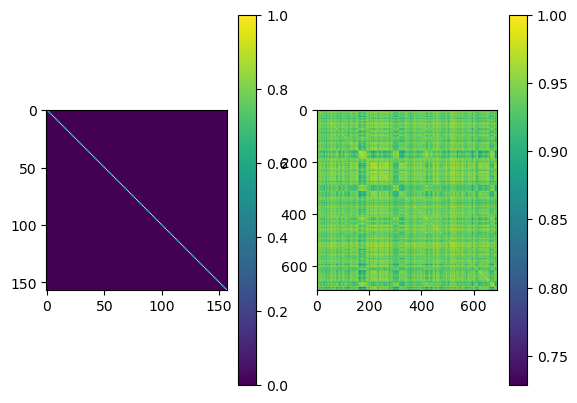

In [324]:
# draw the plot to better choose s1 and s2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
im = ax[0].imshow(K1)
fig.colorbar(im,ax=ax[0])
im2 = ax[1].imshow(K2)
fig.colorbar(im2,ax=ax[1])

## 1.2 MMD-MA

In [325]:
def compute_pairwise_distances(x, y):
    """Computes the squared pairwise Euclidean distances between x and y.
  Args:
    x: a tensor of shape [num_x_samples, num_features]
    y: a tensor of shape [num_y_samples, num_features]
  Returns:
    a distance matrix of dimensions [num_x_samples, num_y_samples].
  Raises:
    ValueError: if the inputs do no matched the specified dimensions.
  """

    if not len(x.get_shape()) == len(y.get_shape()) == 2:
        raise ValueError('Both inputs should be matrices.')

    if x.get_shape().as_list()[1] != y.get_shape().as_list()[1]:
        raise ValueError('The number of features should be the same.')

    norm = lambda x: tf.reduce_sum(tf.square(x), 1)

  # By making the `inner' dimensions of the two matrices equal to 1 using
  # broadcasting then we are essentially substracting every pair of rows
  # of x and y.
  # x will be num_samples x num_features x 1,
  # and y will be 1 x num_features x num_samples (after broadcasting).
  # After the substraction we will get a
  # num_x_samples x num_features x num_y_samples matrix.
  # The resulting dist will be of shape num_y_samples x num_x_samples.
  # and thus we need to transpose it again.
    return tf.transpose(norm(tf.expand_dims(x, 2) - tf.transpose(y)))

def gaussian_kernel_matrix(x, y, sigmas):
    """Computes a Guassian Radial Basis Kernel between the samples of x and y.
  We create a sum of multiple gaussian kernels each having a width sigma_i.
  Args:
    x: a tensor of shape [num_samples, num_features]
    y: a tensor of shape [num_samples, num_features]
    sigmas: a tensor of floats which denote the widths of each of the
      gaussians in the kernel.
  Returns:
    A tensor of shape [num_samples{x}, num_samples{y}] with the RBF kernel.
  """
    beta = 1. / (2. * (tf.expand_dims(sigmas, 1)))
    dist = compute_pairwise_distances(x, y)
    s = tf.matmul(beta, tf.reshape(dist, (1, -1)))

    return tf.reshape(tf.reduce_sum(tf.exp(-s), 0), tf.shape(dist))

def maximum_mean_discrepancy(x, y, kernel=gaussian_kernel_matrix, bandwidth=1.0):
    """Computes the Maximum Mean Discrepancy (MMD) of two samples: x and y.
  Maximum Mean Discrepancy (MMD) is a distance-measure between the samples of
  the distributions of x and y. Here we use the kernel two sample estimate
  using the empirical mean of the two distributions.
  MMD^2(P, Q) = || \E{\phi(x)} - \E{\phi(y)} ||^2
              = \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) },
  where K = <\phi(x), \phi(y)>,
    is the desired kernel function, in this case a radial basis kernel.
  Args:
      x: a tensor of shape [num_samples, num_features]
      y: a tensor of shape [num_samples, num_features]
      kernel: a function which computes the kernel in MMD. Defaults to the
              GaussianKernelMatrix.
  Returns:
      a scalar denoting the squared maximum mean discrepancy loss.
  """
    with tf.name_scope('MaximumMeanDiscrepancy'):
        # \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) }
        cost = tf.reduce_mean(kernel(x, x, tf.constant([bandwidth])))
        cost += tf.reduce_mean(kernel(y, y, tf.constant([bandwidth])))
        cost -= 2 * tf.reduce_mean(kernel(x, y, tf.constant([bandwidth])))

        # We do not allow the loss to become negative.
        cost = tf.where(cost > 0, cost, 0, name='value')
    return cost

In [326]:
k1_matrix = K1
k2_matrix = K2
n1 = k1_matrix.shape[0]
n2 = k2_matrix.shape[0]
K1 = tf.constant(k1_matrix, dtype=tf.float32)
K2 = tf.constant(k2_matrix, dtype=tf.float32)

p = 10 # embeded dim 
k = 100 # random seed
training_rate = 0.00005
bandwidth = 1.0
tradeoff2 = 0.01
tradeoff3 = 0.001
I_p=tf.eye(p)

In [327]:
alpha = tf.Variable(tf.random.uniform([n1, p], minval=0.0, maxval=0.1, seed=k))
beta = tf.Variable(tf.random.uniform([n2, p], minval=0.0, maxval=0.1, seed=k))

optimizer = tf.keras.optimizers.Adam(learning_rate=training_rate)
objbest = 1e20
for i in range(11):
    with tf.GradientTape() as tape:
        mmd_part = maximum_mean_discrepancy(tf.matmul(K1, alpha), tf.matmul(K2, beta), bandwidth=bandwidth)
        penalty_part = tradeoff2 * (tf.norm(tf.subtract(tf.matmul(tf.transpose(alpha), tf.matmul(K1, alpha)), I_p), ord=2) + tf.norm(tf.subtract(tf.matmul(tf.transpose(beta), tf.matmul(K2, beta)), I_p), ord=2))
        distortion_part = tradeoff3 * (tf.norm(tf.subtract(tf.matmul(tf.matmul(K1, alpha), tf.matmul(tf.transpose(alpha), tf.transpose(K1))), K1), ord=2) + tf.norm(tf.subtract(tf.matmul(tf.matmul(K2, beta), tf.matmul(tf.transpose(beta), tf.transpose(K2))), K2), ord=2))
        myFunction = mmd_part + penalty_part + distortion_part

    gradients = tape.gradient(myFunction, [alpha, beta])
    optimizer.apply_gradients(zip(gradients, [alpha, beta]))

    #if i % 100 == 0:
    if objbest > myFunction.numpy():
        objbest = myFunction.numpy()
        alpha_best = alpha.numpy()
        beta_best = beta.numpy()
        besti = i
        rec = '\t'.join([str(k), str(i), str(myFunction.numpy()), str(mmd_part.numpy()), str(penalty_part.numpy()), str(distortion_part.numpy())])
        print(rec)
        #record.write(rec + '\n')

np.savetxt("alpha_hat_" + str(k) + "_" + str(besti) + ".txt", alpha_best)
np.savetxt("beta_hat_" + str(k) + "_" + str(besti) + ".txt", beta_best)

100	0	7296.6206	1.4583635	111.073746	7184.0884
100	1	7281.9917	1.4586926	110.85104	7169.682
100	2	7267.379	1.4590218	110.628555	7155.2915
100	3	7252.782	1.4593515	110.40632	7140.9165
100	4	7238.199	1.4596817	110.18431	7126.555
100	5	7223.633	1.4600122	109.96255	7112.2104
100	6	7209.0825	1.460343	109.74102	7097.8813
100	7	7194.549	1.460674	109.51975	7083.5684
100	8	7180.0317	1.4610057	109.298744	7069.272
100	9	7165.5312	1.4613374	109.07799	7054.9917
100	10	7151.0483	1.4616697	108.857475	7040.729


In [328]:
np.shape(alpha_best)

(157, 10)

In [329]:
np.shape(beta_best)

(691, 10)

# 3 UMAP Plot

In [330]:
import umap
import sklearn.datasets
import umap.plot

In [331]:
# Umap need a matrix obs by features
Embed_Stack = np.vstack((alpha_best,beta_best))

# label
N_K1 = np.shape(alpha_best)[0]
Label = np.zeros(np.shape(Embed_Stack)[0])
Label[N_K1:] = 1

mapper = umap.UMAP().fit(Embed_Stack)

<Axes: >

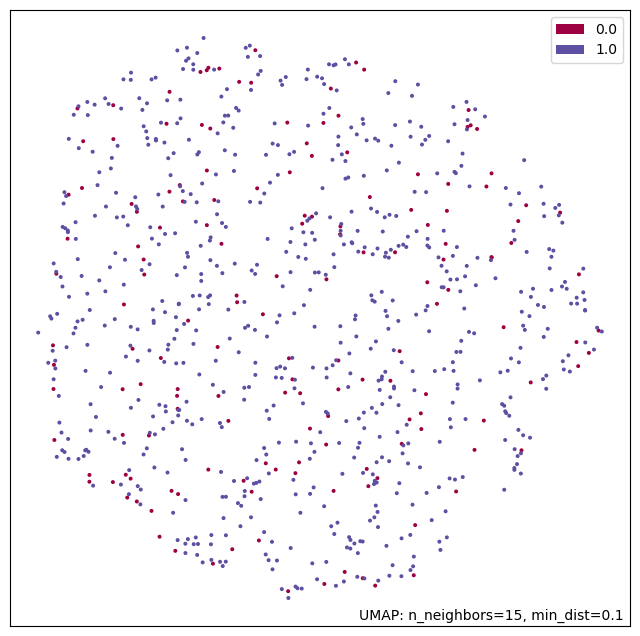

In [332]:
umap.plot.points(mapper, labels=Label)

## 3.1 KNN to transfer labels

In [333]:
from sklearn.neighbors import KNeighborsClassifier
Braak = anndata_ROSMAP.obs['braaksc']
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(alpha_best,Braak)

KNeighborsClassifier(n_neighbors=1)

In [334]:
y_pred = np.zeros(len(ANMergeSampleID))
y_pred = -1+y_pred

for i in range(len(ANMergeSampleID)):
    y_pred[i] = neigh.predict([beta_best[i,:]])

In [335]:
anndata_Target.obs['braaksc_trans'] = y_pred

In [336]:
anndata_Target.obs.head(5)

,DX,CDRSOB,braaksc_trans
DCR00001_1,AD,5.0,5.0
DCR00004_1,MCI,0.5,5.0
DCR00009_1,CTL,0.0,4.0
DCR00013_1,CTL,0.0,5.0
DCR00014_1,CTL,inf,4.0


# Classify

In [337]:
Label = list()
SID = list(anndata_Target.obs.index)

for gt in SID:
    CRD = anndata_Target.obs.loc[gt,:].CDRSOB
    Braak = anndata_Target.obs.loc[gt,:].braaksc_trans
    Dx = anndata_Target.obs.loc[gt,:].DX
    if CRD > 4 and Braak >=4:
        Label.append("Typical AD")
    elif CRD <= 4 and Braak >=4 and CRD > 0:
        Label.append("Asym AD")
    elif CRD > 4 and Braak <=2:
        Label.append("Low-NFT AD")
    elif CRD <= 0.5 and Braak <=2:
        Label.append("Control")
    else:
        Label.append("Others")

In [338]:
anndata_Target.obs['NewLabel'] = Label

In [339]:
df = anndata_Target.obs[anndata_Target.obs.NewLabel=='Asym AD']
counter = collections.Counter(df['DX'])
print(counter)
Acc_Asym = (counter['CTL'] + counter['MCI']) / df.shape[0]
print("Asym AD transfer accuracy is ", Acc_Asym)

Counter({'MCI': 174, 'AD': 40, 'CTL': 30})
Asym AD transfer accuracy is  0.8360655737704918


In [340]:
df = anndata_Target.obs[anndata_Target.obs.NewLabel=='Typical AD']
counter = collections.Counter(df['DX'])
print(counter)
Acc_TAD = (counter['AD'] + counter['MCI']) / df.shape[0]
print("Typical AD transfer accuracy is ", Acc_TAD)

Counter({'AD': 153, 'CTL': 14, 'MCI': 14})
Typical AD transfer accuracy is  0.9226519337016574


In [341]:
df = anndata_Target.obs[anndata_Target.obs.NewLabel=='Low-NFT AD']
counter = collections.Counter(df['DX'])
print(counter)
Acc_LTau = (counter['AD'] + counter['MCI']) / df.shape[0]
print("Low-NFT AD transfer accuracy is ", Acc_LTau)

Counter({'AD': 21, 'CTL': 6, 'MCI': 2})
Low-NFT AD transfer accuracy is  0.7931034482758621


In [342]:
df = anndata_Target.obs[anndata_Target.obs.NewLabel=='Control']
counter = collections.Counter(df['DX'])
print(counter)
Acc_CN = (counter['CTL']) / df.shape[0]
print("Control transfer accuracy is ", Acc_CN)

Counter({'CTL': 30, 'MCI': 9, 'AD': 1})
Control transfer accuracy is  0.75


In [343]:
df = anndata_Target.obs[anndata_Target.obs.NewLabel=='Others']
counter = collections.Counter(df['DX'])
print(counter)

Counter({'CTL': 169, 'MCI': 20, 'AD': 8})


In [344]:
Acc_Avg = (Acc_Asym + Acc_CN + Acc_LTau + Acc_TAD)/4
print("Avg acc is ", Acc_Avg)

Avg acc is  0.8254552389370029


In [345]:
counter = collections.Counter(Label)
print(counter)

Counter({'Asym AD': 244, 'Others': 197, 'Typical AD': 181, 'Control': 40, 'Low-NFT AD': 29})


In [346]:
len(Label)-247

444

## 3.2 Evaulation

In [20]:
#Mapping = {'Control': 0, 'Typical.AD': 1, 'Asym.AD': 2, 'LowNFT.AD': 3}
#Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}


pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))

pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
true_ind_tad_aad = list(true_ind_aad) + list(true_ind_tad)
overlap = list(set(pred_ind_tad) & set(true_ind_tad_aad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad_cn = list(pred_ind_aad) #+ list(pred_ind_cn)
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
print("precision of AAD  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_aad_cn = list(pred_ind_cn) #list(pred_ind_aad) + 
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
if len(pred_ind_aad_cn) == 0:
    print("precision of CN  is 0")
else:
    print("precision of CN  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_lt = np.where(y_pred==3)[0]
true_ind_lt = np.where(y_true==1)[0]
true_ind_lt_aad = list(true_ind_aad) + list(true_ind_lt)
overlap = list(set(pred_ind_lt) & set(true_ind_lt_aad))
if len(pred_ind_lt) == 0:
    print("precision of LowTau is 0")
else:
    print("precision of LowTau is ", len(overlap)/len(pred_ind_lt))


precision of TAD is  0.6859903381642513
precision of AAD  is  0.854679802955665
precision of CN  is  0.8584905660377359
precision of LowTau is  0.68
